## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


In [86]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
print dataset

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

## STEP 3 : Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [18]:
#Dimension of the data , a quick eye how the data are
print(dataset.shape)

(150, 5)


In [19]:
#Peak of the data
#head of data
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [20]:
#Statistical summary of each attribute , count, mean, the min and max values
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [21]:
#The class distribution ,  the number of instances (rows) that belong to each class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


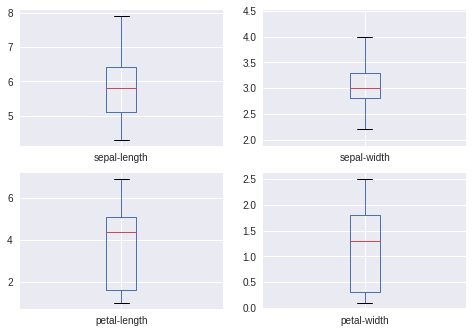

In [22]:
#Univariate plots,plots of each individual variable. 
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

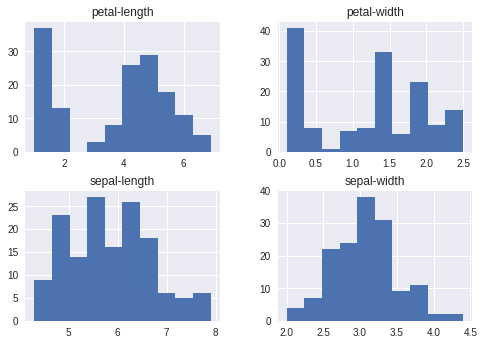

In [23]:
#univariate using histogramms
dataset.hist()
plt.show()

/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


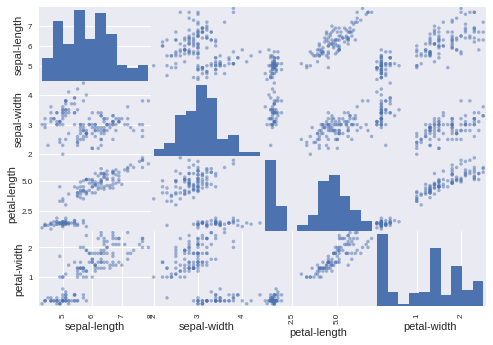

In [24]:
#Multivariate Plots
## scatterplots of all pairs of attributes , a way to spot structured relationships between input variables.
##the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.
scatter_matrix(dataset)
plt.show()

## Step 4: Prepare Data

In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

## Step 6: Algorithm Selection


In [70]:
##Apply a set of algorithms and select the best model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [71]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [80]:


validation_size = 0.20
seed = 7
scoring = 'accuracy'


results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.880000 (0.148474)
LDA: 0.966667 (0.061464)
KNN: 0.933333 (0.084327)
CART: 0.960000 (0.053333)
NB: 0.946667 (0.058119)
SVM: 0.953333 (0.052068)


## Step 7: Finalise Model & Step 8: Model Training


In [81]:
##Split the dataset into training/test sets (with test set being the 20% of the dataset) 
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

In [82]:
#Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
#This is the most common evaluation metric for classification problems, it is also the most misused. 
#It is really only suitable when there are an equal number of observations in each class (which is rarely the case)
#and that all predictions and prediction errors are equally important, which is often not the case.


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


knn = LinearDiscriminantAnalysis()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

##The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.
#We can see that the accuracy is 0.9 or 90%. 
#The confusion matrix provides an indication of the three errors made. 
#Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support

0.966666666667
[[10  0  0]
 [ 0  6  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.93      1.00      0.96        13

    avg / total       0.97      0.97      0.97        30

